<a href="https://colab.research.google.com/github/pearlchompunoot/Loan_approval_dataset_Kaggle/blob/main/loan_approval_dataset_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Preprocessing

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np

data = pd.read_csv('loan_approval_dataset.csv')

In [109]:
#print column names
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

#### There are spaces in the column names. Therefore, we should trim them.

In [110]:
# Trim column names
data.columns = data.columns.str.strip()

## 2. Define goals

https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

Analyze what might affect loan approval

## 3. Initial Data Exploration

In [111]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


Notes
- A CIBIL score is a three-digit number that summarizes the credit history and creditworthiness
- a loan term is length of time the person have to repay a loan

In [113]:
#see statistics of numerical features
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


### Define numerical and categorical features

In [114]:

numerical_features = ['income_annum', 'loan_amount', 'cibil_score',  'residential_assets_value',
                     'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
categorical_features = ['no_of_dependents', 'education', 'self_employed', 'loan_term', 'loan_status']



In [115]:
# check for null values

null_counts = data.isnull().sum()

# Print the columns with null values and their counts
print("Null value counts per column:\n", null_counts[null_counts > 0])

# Check if any null values exist in the entire DataFrame
if data.isnull().values.any():
    print("\nNull values exist in the DataFrame.")
else:
    print("\nNo null values found in the DataFrame.")


Null value counts per column:
 Series([], dtype: int64)

No null values found in the DataFrame.


## 4. EDA

### Univariate EDA

#### Numerical features

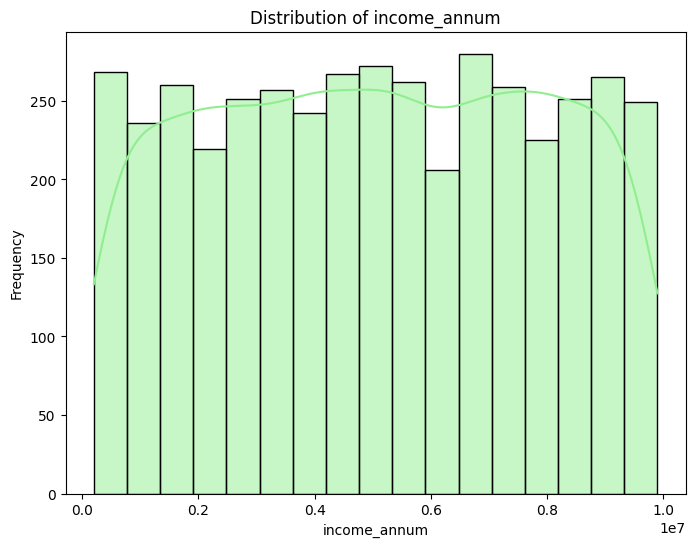

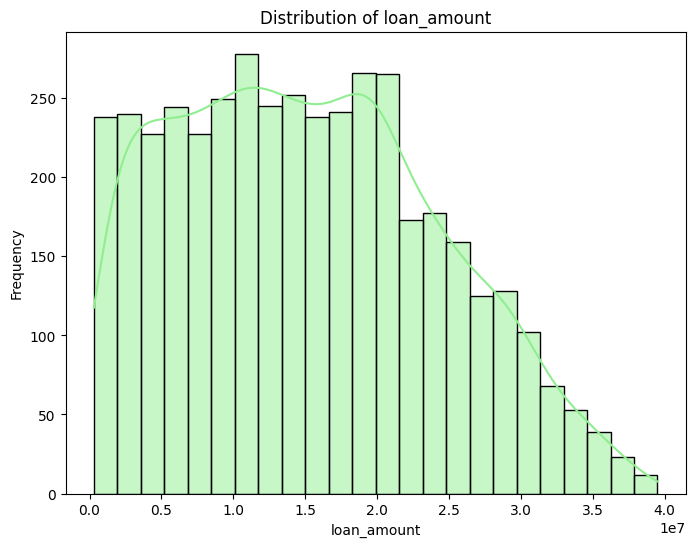

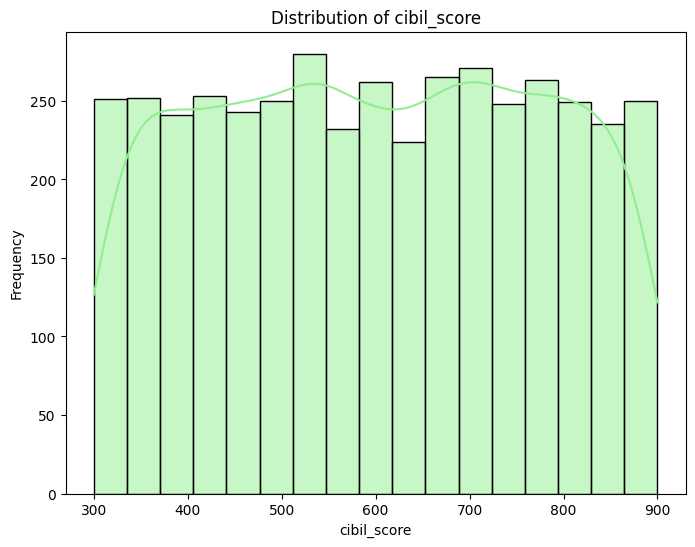

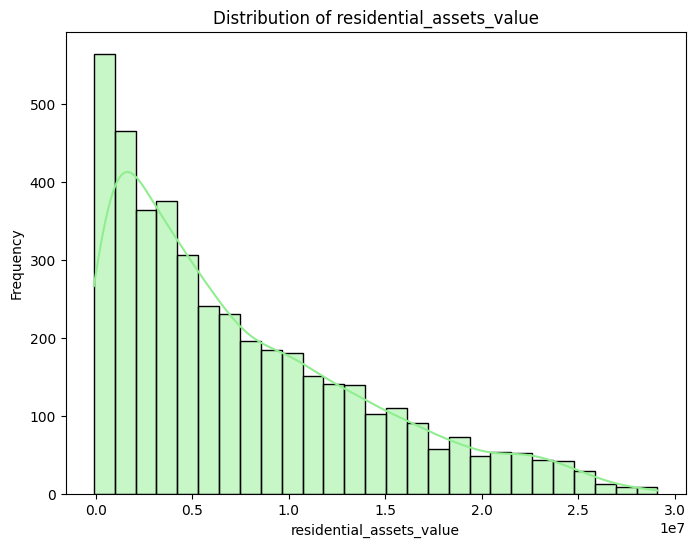

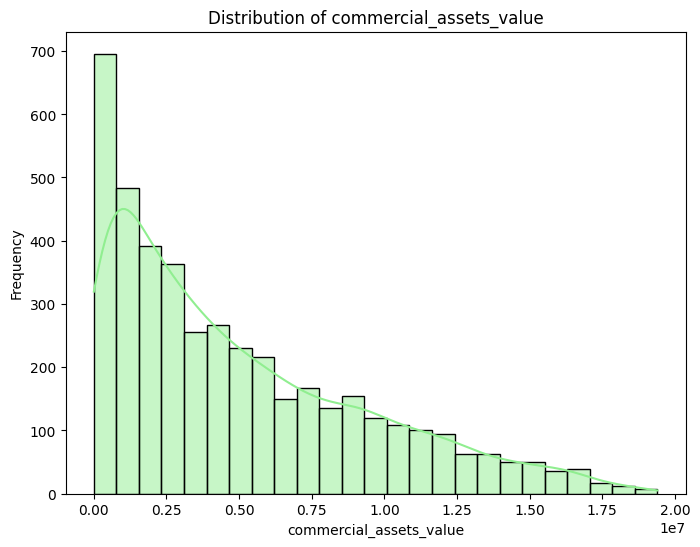

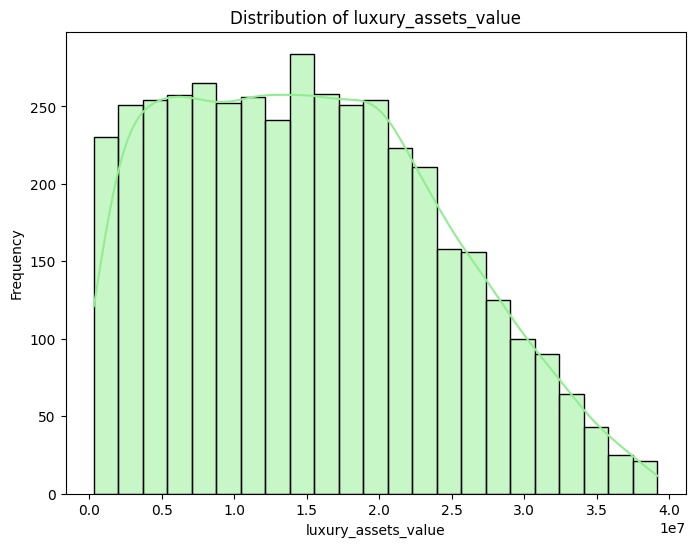

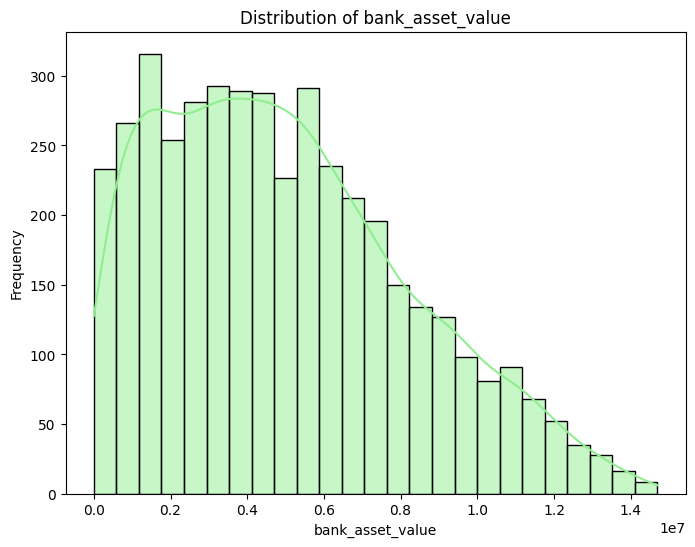

In [116]:

# Distribution of numerical features
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True, color = 'lightgreen')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


##### Insights:

With the exception of cibil_score and income_annum, the numerical features exhibit a right-skewed distribution.

This indicates that while most applicants in the datasets have relatively lower values for assets and loan amounts, a smaller portion has significantly higher values.

#### Categorical features

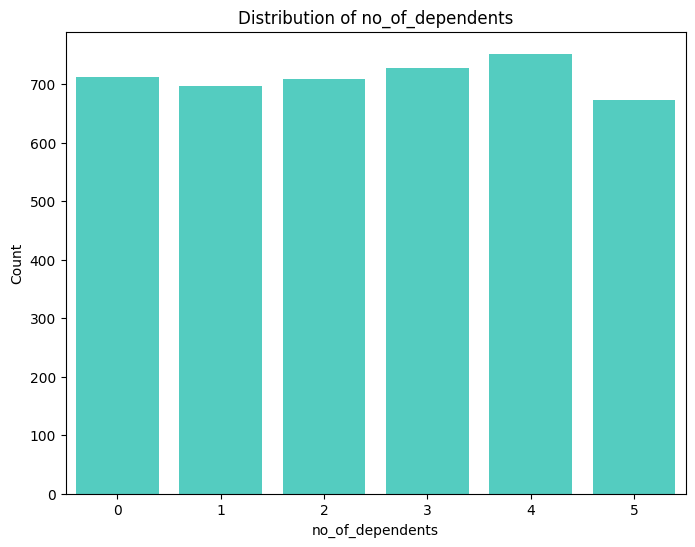

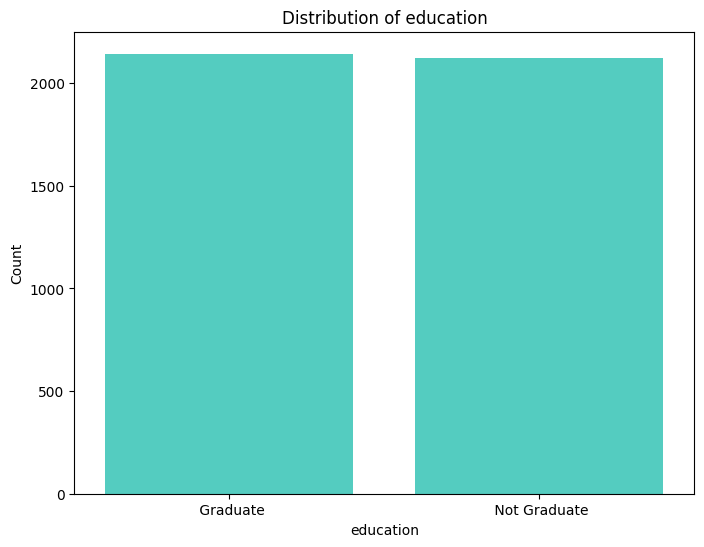

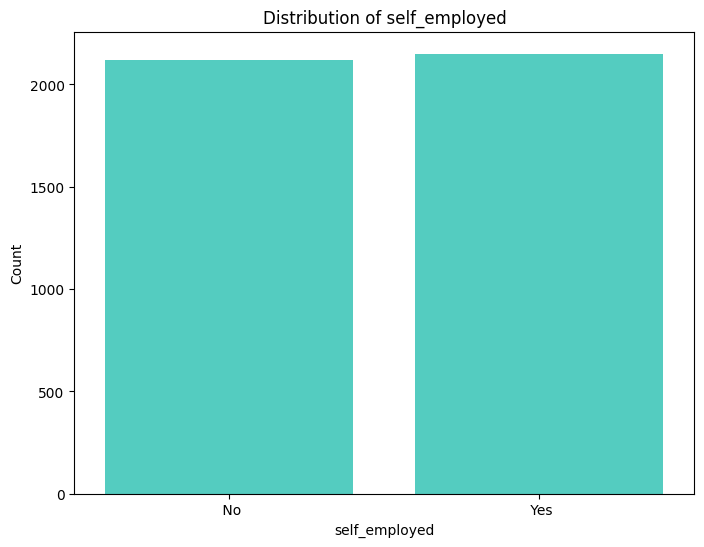

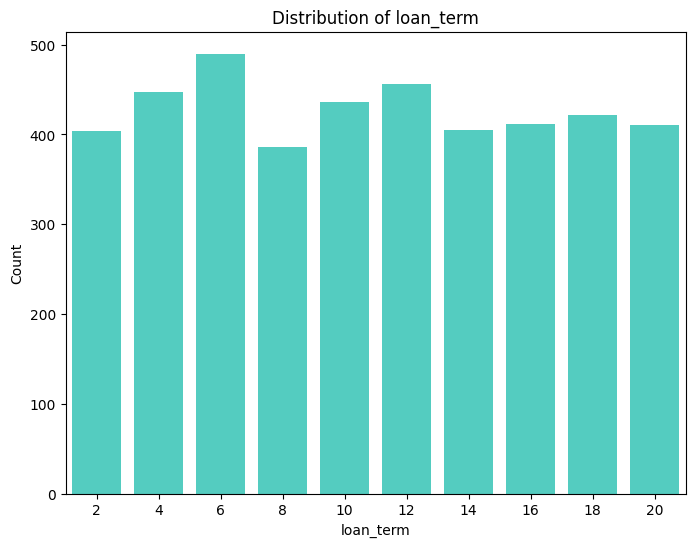

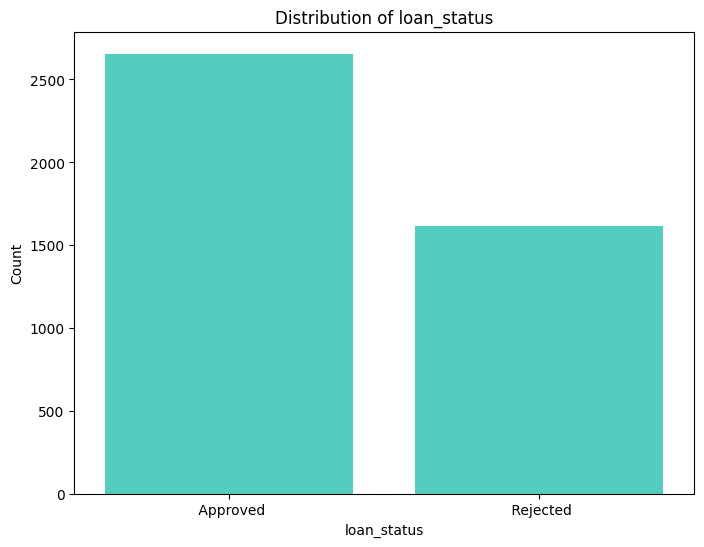

In [117]:
# distribution of categorical features


for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data, color='turquoise')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


In [118]:

# Calculate the percentage of loan approvals
approval_percentage = (data['loan_status'].value_counts(normalize=True) * 100)
approval_percentage


,proportion
loan_status,
Approved,62.215976
Rejected,37.784024


##### Insights:
1. Most of the features are evenly distributed
2. For the target: loan_status, about 62% got approved.

### Bivariate EDA

We will examine how the distribution of each numerical feature differs between approved and rejected loan applications

#### loan_status vs numerical features

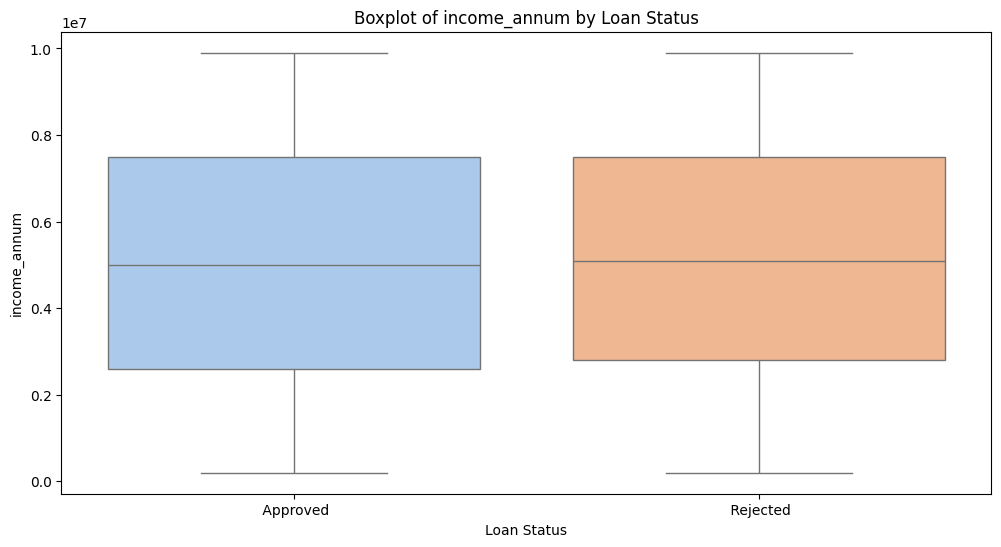

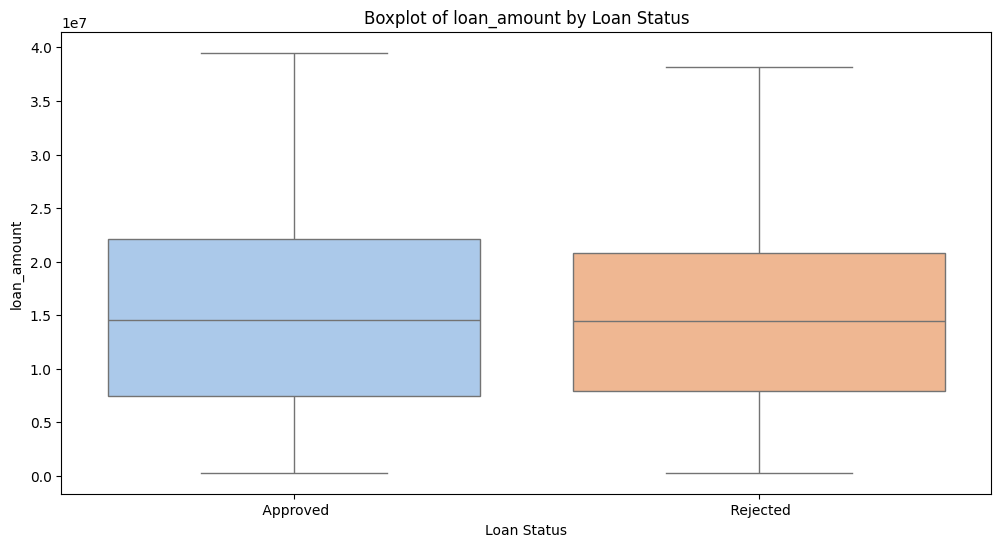

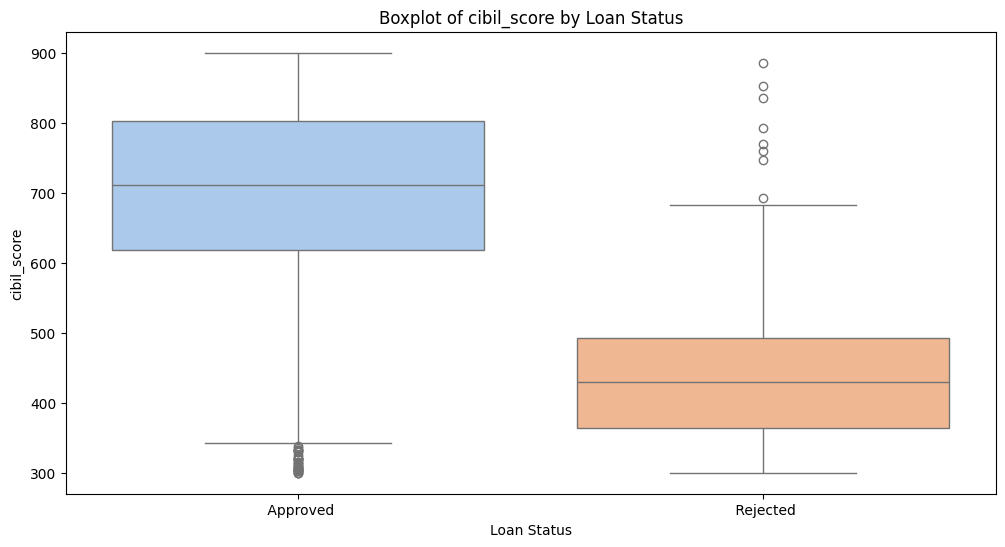

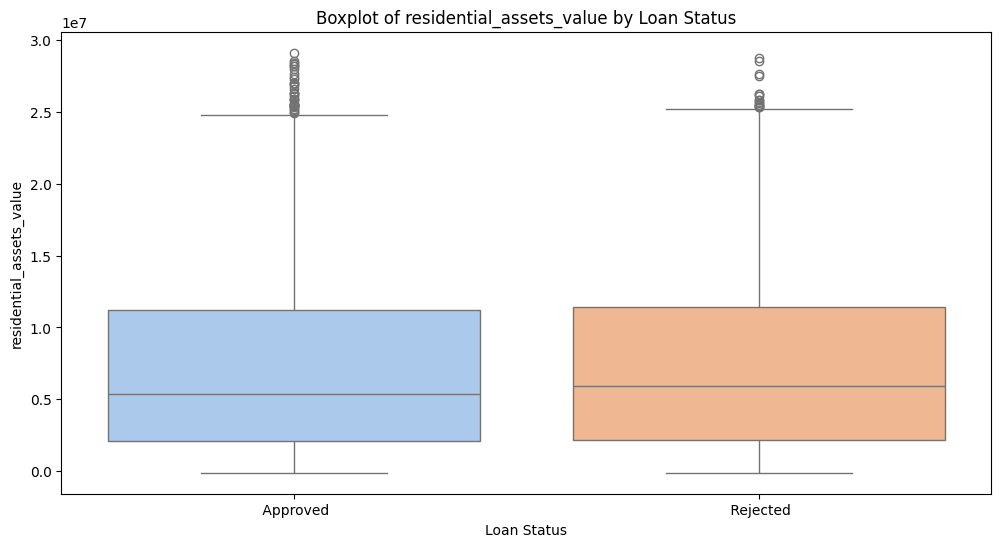

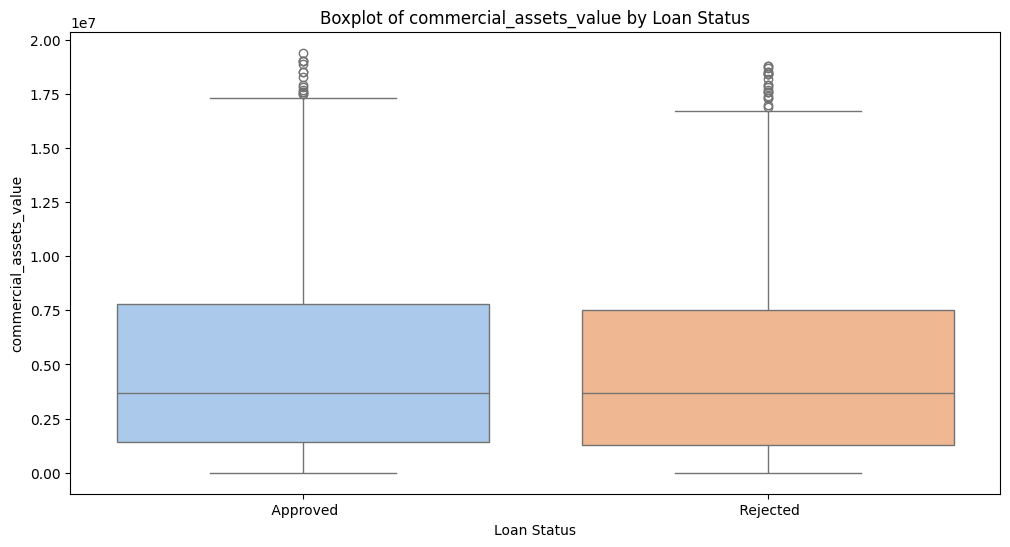

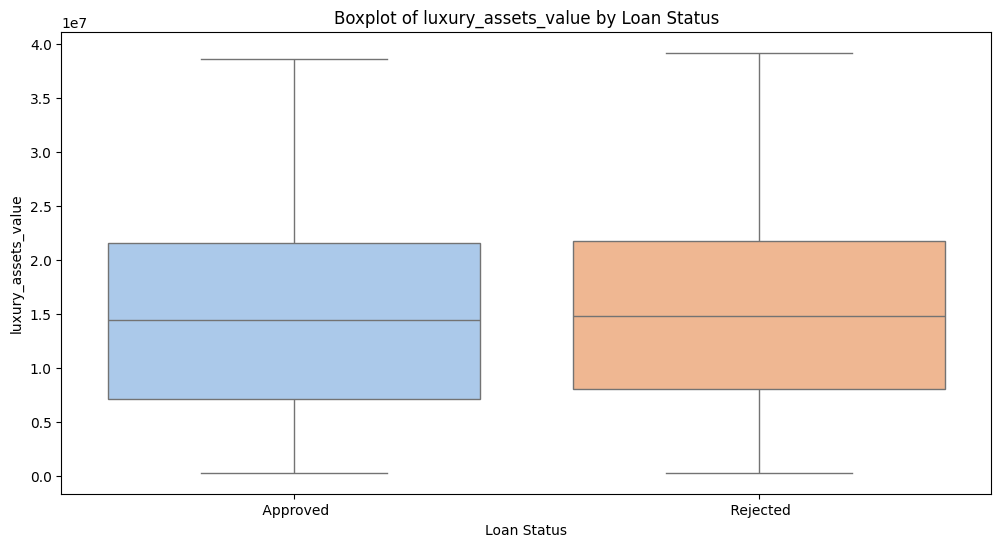

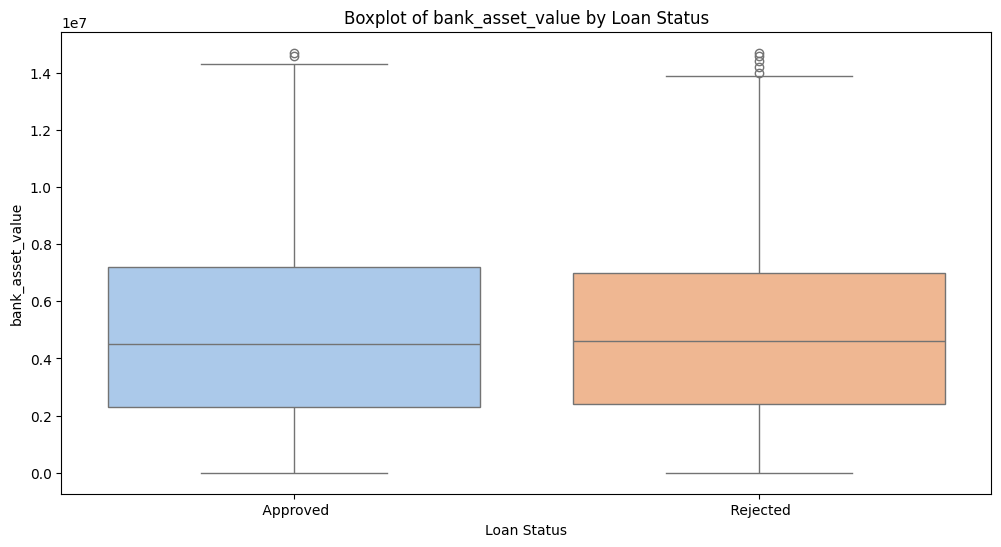

In [119]:

for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='loan_status', y=feature, data=data, hue='loan_status',palette='pastel')
    plt.title(f'Boxplot of {feature} by Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(feature)
    plt.show()


In [120]:


# Group data by loan status and describe numerical features
grouped_data = data.groupby('loan_status')[numerical_features].describe()
grouped_data


income_annum                                                   \
                   count          mean           std       min        25%   
loan_status                                                                 
Approved          2656.0  5.025904e+06  2.827228e+06  200000.0  2600000.0   
Rejected          1613.0  5.113825e+06  2.772946e+06  200000.0  2800000.0   

                                             loan_amount                \
                   50%        75%        max       count          mean   
loan_status                                                              
Approved     5000000.0  7500000.0  9900000.0      2656.0  1.524725e+07   
Rejected     5100000.0  7500000.0  9900000.0      1613.0  1.494606e+07   

                                                                        \
                      std       min        25%         50%         75%   
loan_status                                                              
Approved     9.221696e+06  300000.0  7500000.0  14600000.0  22100000.0   
Rejected     8.741390e+06  300000.0  7900000.0  14500000.0  20800000.0   

                        cibil_score                                        \
                    max       count        mean         std    min    25%   
loan_status                                                                 
Approved     39500000.0      2656.0  703.461973  125.249016  300.0  618.0   
Rejected     38200000.0      1613.0  429.468072   78.401752  300.0  364.0   

                                 residential_assets_value                \
               50%    75%    max                    count          mean   
loan_status                                                               
Approved     711.0  803.0  900.0                   2656.0  7.399812e+06   
Rejected     429.0  493.0  885.0                   1613.0  7.592498e+06   

                                                                       \
                      std       min        25%        50%         75%   
loan_status                                                             
Approved     6.501363e+06 -100000.0  2100000.0  5400000.0  11200000.0   
Rejected     6.507619e+06 -100000.0  2200000.0  5900000.0  11400000.0   

                        commercial_assets_value                              \
                    max                   count          mean           std   
loan_status                                                                   
Approved     29100000.0                  2656.0  5.001355e+06  4.390803e+06   
Rejected     28700000.0                  1613.0  4.926720e+06  4.386905e+06   

                                                               \
             min        25%        50%        75%         max   
loan_status                                                     
Approved     0.0  1400000.0  3700000.0  7800000.0  19400000.0   
Rejected     0.0  1300000.0  3700000.0  7500000.0  18800000.0   

            luxury_assets_value                                        \
                          count          mean           std       min   
loan_status                                                             
Approved                 2656.0  1.501660e+07  9.154286e+06  300000.0   
Rejected                 1613.0  1.530694e+07  9.019850e+06  300000.0   

                                                           bank_asset_value  \
                   25%         50%         75%         max            count   
loan_status                                                                   
Approved     7100000.0  14400000.0  21600000.0  38600000.0           2656.0   
Rejected     8100000.0  14800000.0  21800000.0  39200000.0           1613.0   

                                                                               \
                     mean           std  min        25%        50%        75%   
loan_status                                                                     
Approved     4.959526e+06  3.

##### Insights:
1. Cibil_score has an obvious difference between approved and rejected applicants. Most applicants who have low score got rejected, while there are some outliers

2. Income of applicants and loan amount requested, by themselves, aren't strongly different between approved and rejected loans.

3. Individual asset values of applicants are not strongly different between approved and rejected loans.

#### Correlation matrix

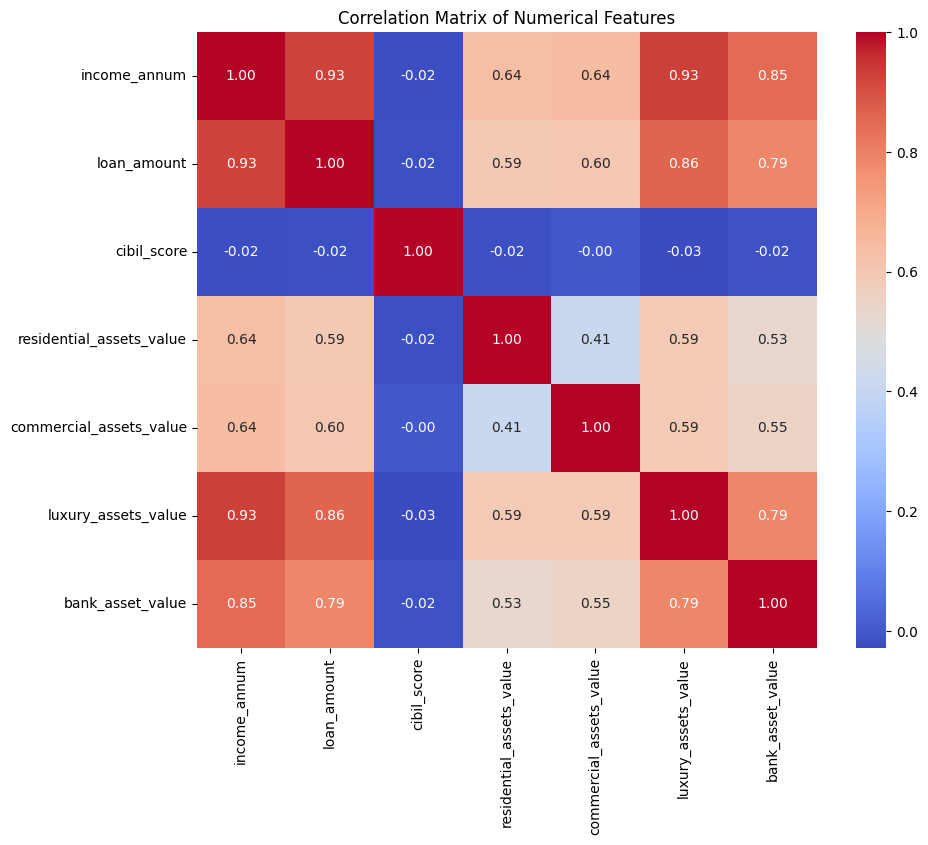

In [121]:

correlation_matrix = data[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


For further analysis we will conduct charts seeing distribution of each categorical variable between different loan_status. Therefore, we will remove 'loan_status' from categorical features.

In [122]:
categorical_features

['no_of_dependents', 'education', 'self_employed', 'loan_term', 'loan_status']

In [123]:
categorical_features.remove('loan_status')

In [124]:
categorical_features

['no_of_dependents', 'education', 'self_employed', 'loan_term']

Now, we can examine how the distribution of each categorical feature differs between approved and rejected loan applications

#### loan_status with categorical variables

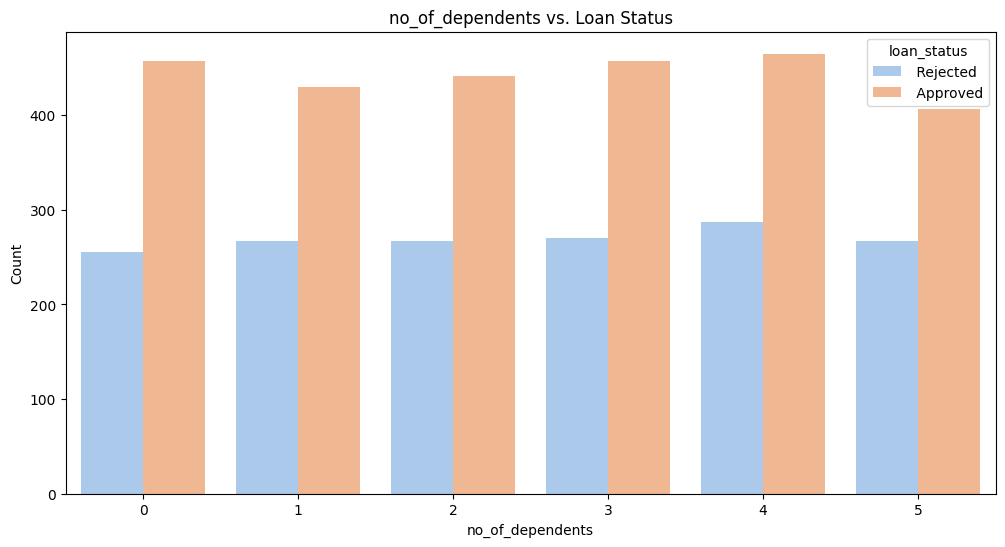

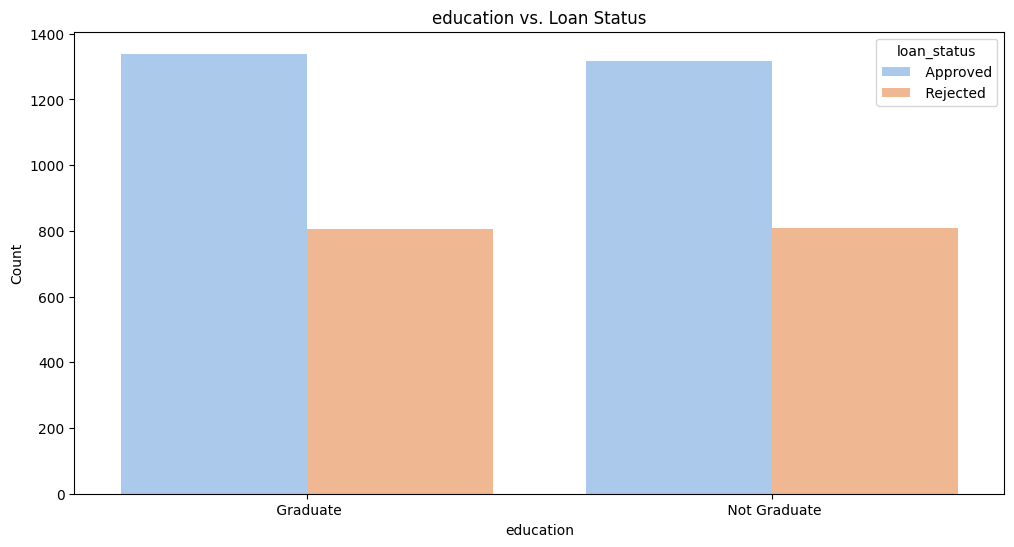

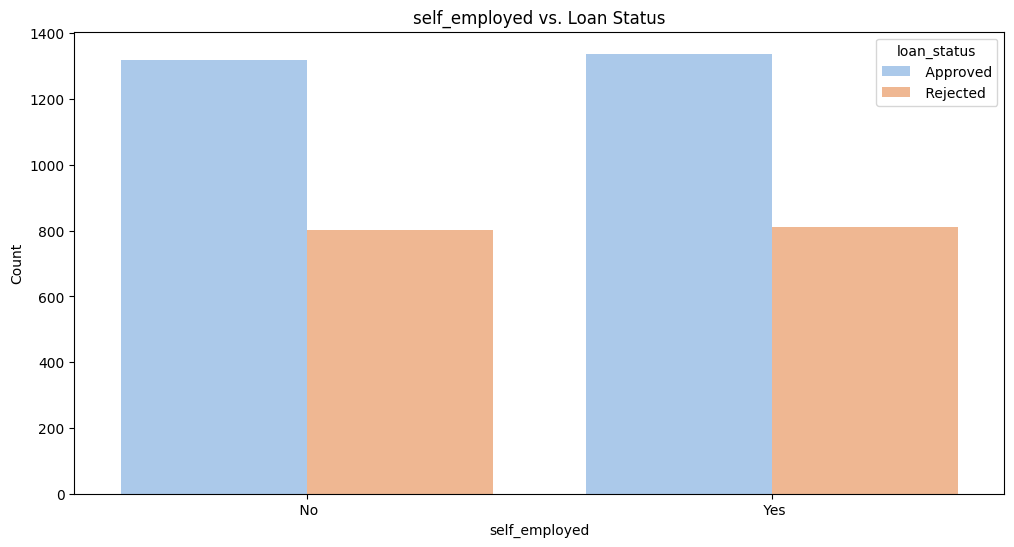

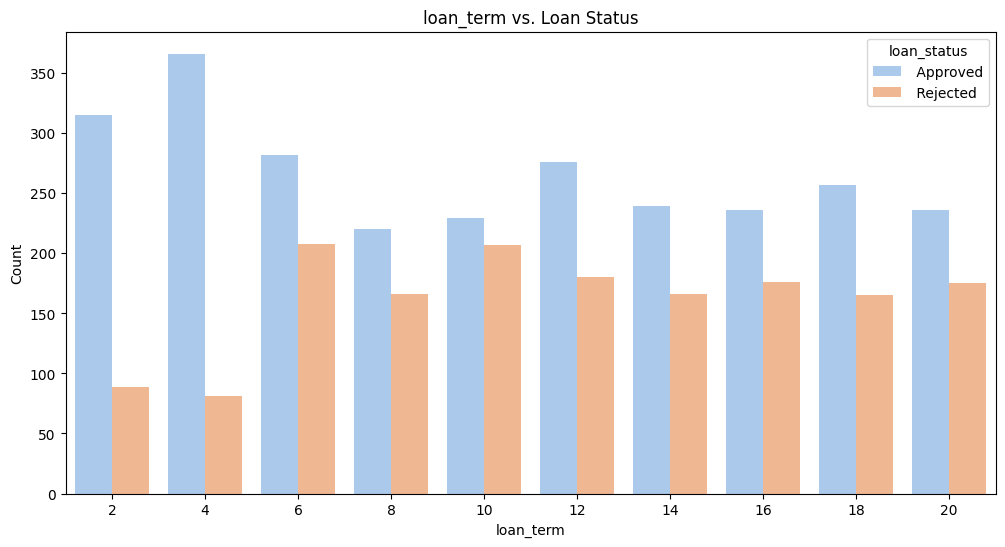

In [125]:

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, hue='loan_status', data=data, palette='pastel')
    plt.title(f'{feature} vs. Loan Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()



##### What is the approval rate of each loan term

In [126]:


loan_term_approval_rates = data.groupby('loan_term')['loan_status'].value_counts(normalize=True).unstack()
loan_term_approval_rates

loan_status,Approved,Rejected
loan_term,,
2,0.779703,0.220297
4,0.818792,0.181208
6,0.575510,0.424490
8,0.569948,0.430052
10,0.525229,0.474771
12,0.605263,0.394737
14,0.590123,0.409877
16,0.572816,0.427184
18,0.609005,0.390995


##### Insights:
Loan_term = 2 amd 4 are having the highest approval rates.

#### Other possible relationship

We can see from previous analysis that income_annum of applicants have just slight differences between rejected and approved loans. And from correlation matrix, income have strong positive correlations with other several features.

We can visualize the relationships.


Correlation between income and loan amount: 0.9274699109871487


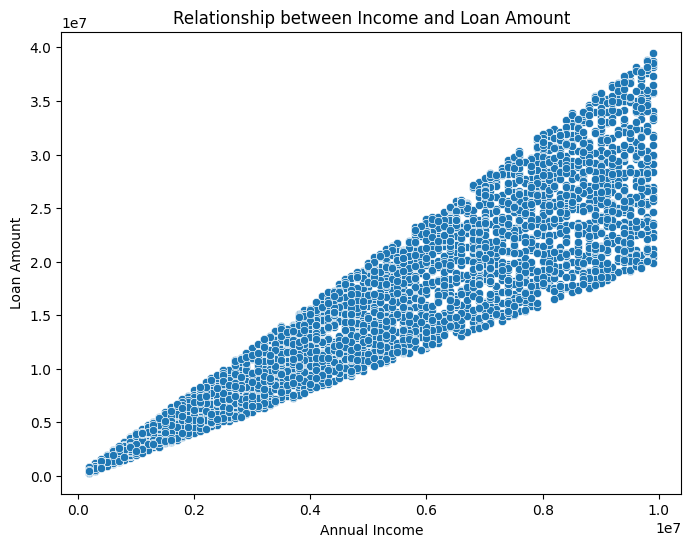

In [127]:
# Income vs loan amount

correlation = data['income_annum'].corr(data['loan_amount'])
print(f"Correlation between income and loan amount: {correlation}")

# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='income_annum', y='loan_amount', data=data)
plt.title('Relationship between Income and Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()


Correlation between residential_assets_value and income_annum: 0.6368414656384733


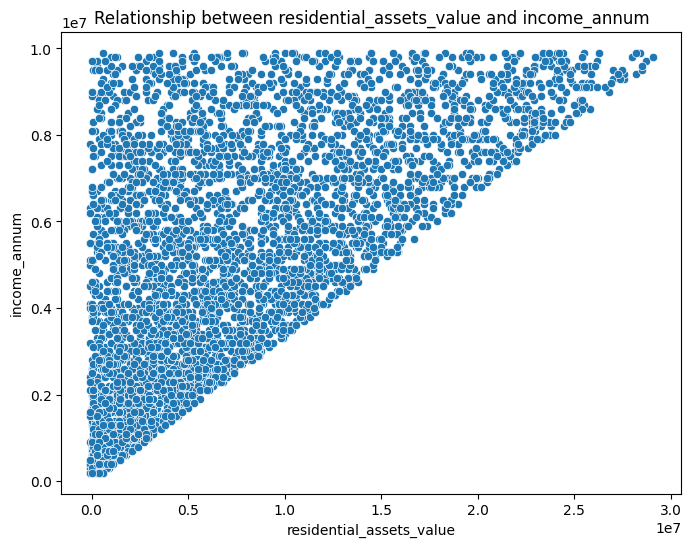

Correlation between commercial_assets_value and income_annum: 0.6403276980353092


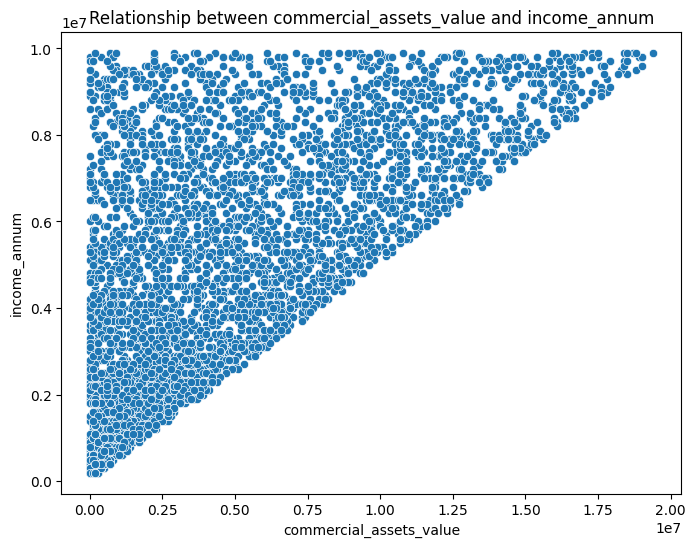

Correlation between luxury_assets_value and income_annum: 0.9291454207522586


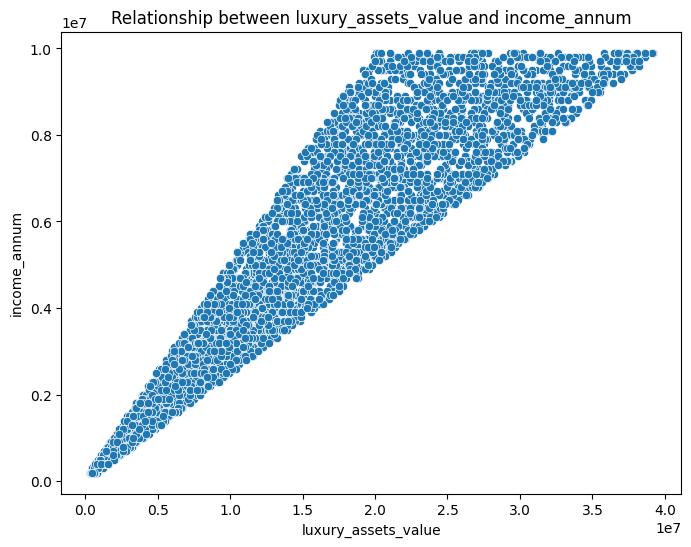

Correlation between bank_asset_value and income_annum: 0.8510931279404549


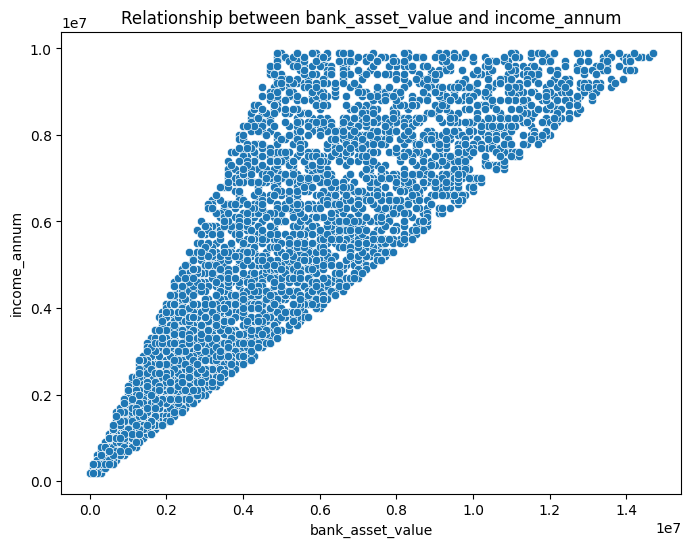

In [128]:
# assets value vs income

for column in ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']:
    correlation = data[column].corr(data['income_annum'])
    print(f"Correlation between {column} and income_annum: {correlation}")

    # Visualize the relationship using a scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=column, y='income_annum', data=data)
    plt.title(f'Relationship between {column} and income_annum')
    plt.xlabel(column)
    plt.ylabel('income_annum')
    plt.show()


##### Insights:

A strong positive correlation exists between income_annum and loan amount, indicating that higher-income applicants tend to request larger loans.

In addition, income_annum positively correlates with asset values, particularly luxury_assets_value and bank_asset_value.
However, for commercial_assets_value and residential_assets_value, even there are positively correlated with income, the relationship is less pronounced. Some high-income applicants having relatively lower holdings of these assets.

### Split the data

In [129]:

from sklearn.model_selection import train_test_split

X = data.drop(['loan_status', 'loan_id'], axis=1)
y = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")


Training data shape: (3415, 11), (3415,)
Testing data shape: (854, 11), (854,)


## 5. Feature engineering

In [130]:
X_train

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1675,5,Not Graduate,No,7900000,29900000,6,568,5800000,13900000,15900000,8700000
1164,0,Not Graduate,Yes,9600000,34000000,12,710,23800000,10300000,38100000,7800000
192,1,Graduate,No,800000,2900000,8,682,2200000,1100000,2900000,700000
910,2,Graduate,Yes,4900000,13100000,18,754,8200000,3300000,16500000,7200000
567,5,Graduate,Yes,3000000,11100000,12,441,8500000,2500000,7300000,2000000
...,...,...,...,...,...,...,...,...,...,...,...
3444,0,Graduate,Yes,1300000,4700000,16,530,3200000,1000000,3800000,800000
466,5,Not Graduate,Yes,500000,1800000,18,411,1000000,500000,1300000,200000
3092,4,Not Graduate,Yes,8600000,20600000,16,449,10800000,10600000,28700000,5400000
3772,2,Not Graduate,Yes,7000000,21400000,12,541,3700000,1300000,19800000,9600000


### New features creation
As there seems to be relationship between assets value and income, we create new features of ratio of individual asset value to income.

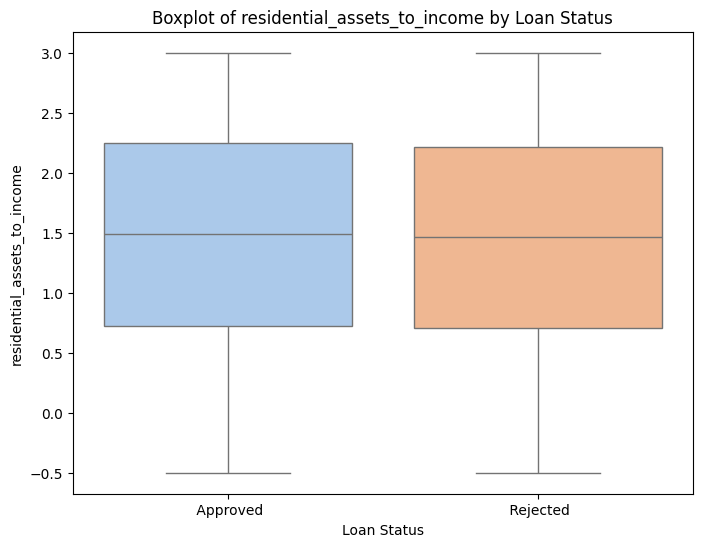

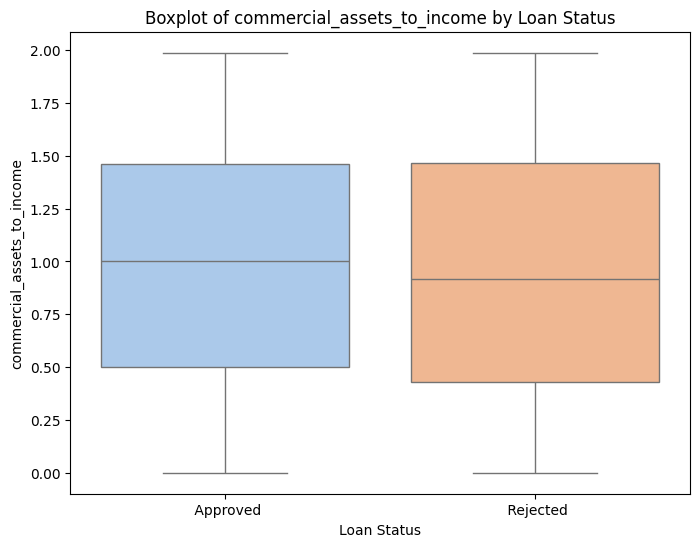

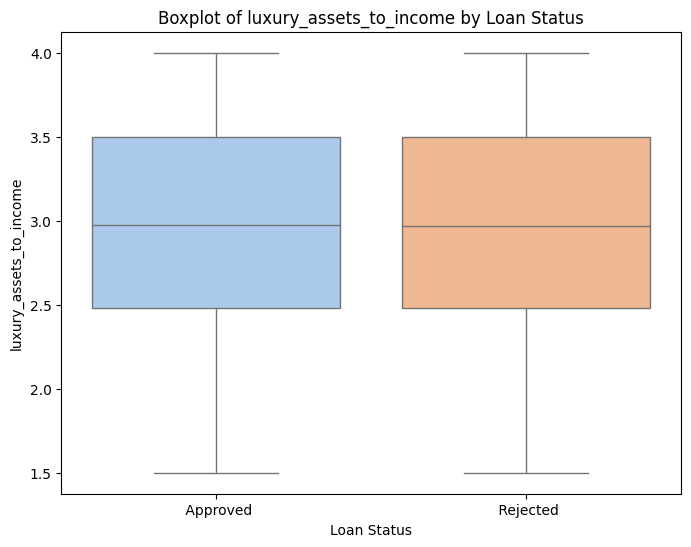

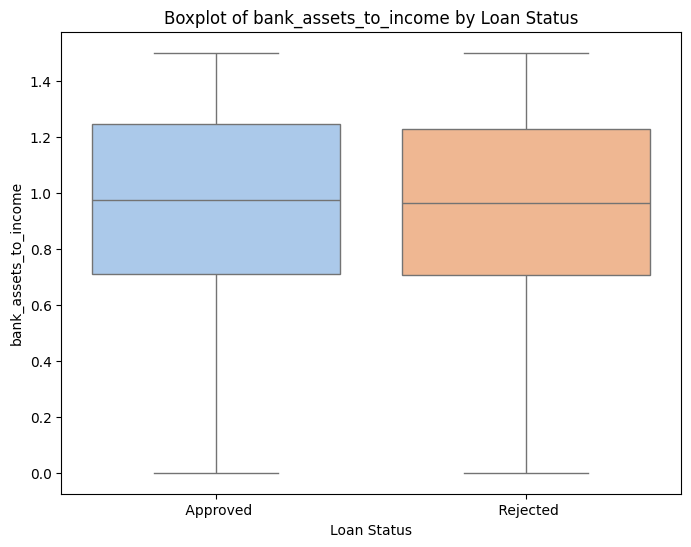

In [131]:

# Calculate the proportion of each asset to income
data['residential_assets_to_income'] = data['residential_assets_value'] / data['income_annum']
data['commercial_assets_to_income'] = data['commercial_assets_value'] / data['income_annum']
data['luxury_assets_to_income'] = data['luxury_assets_value'] / data['income_annum']
data['bank_assets_to_income'] = data['bank_asset_value'] / data['income_annum']

# Handle potential infinite values resulting from division by zero
data.replace([np.inf, -np.inf], 0, inplace=True)

# Add new features to the numerical features list
numerical_features.extend(['residential_assets_to_income', 'commercial_assets_to_income',
                           'luxury_assets_to_income', 'bank_assets_to_income'])


for feature in ['residential_assets_to_income', 'commercial_assets_to_income',
                'luxury_assets_to_income', 'bank_assets_to_income']:

                plt.figure(figsize=(8, 6))
                sns.boxplot(x='loan_status', y=f'{feature}', data=data, hue = 'loan_status', palette = 'pastel')
                plt.title(f'Boxplot of {feature} by Loan Status')
                plt.xlabel('Loan Status')
                plt.ylabel(feature)
                plt.show()


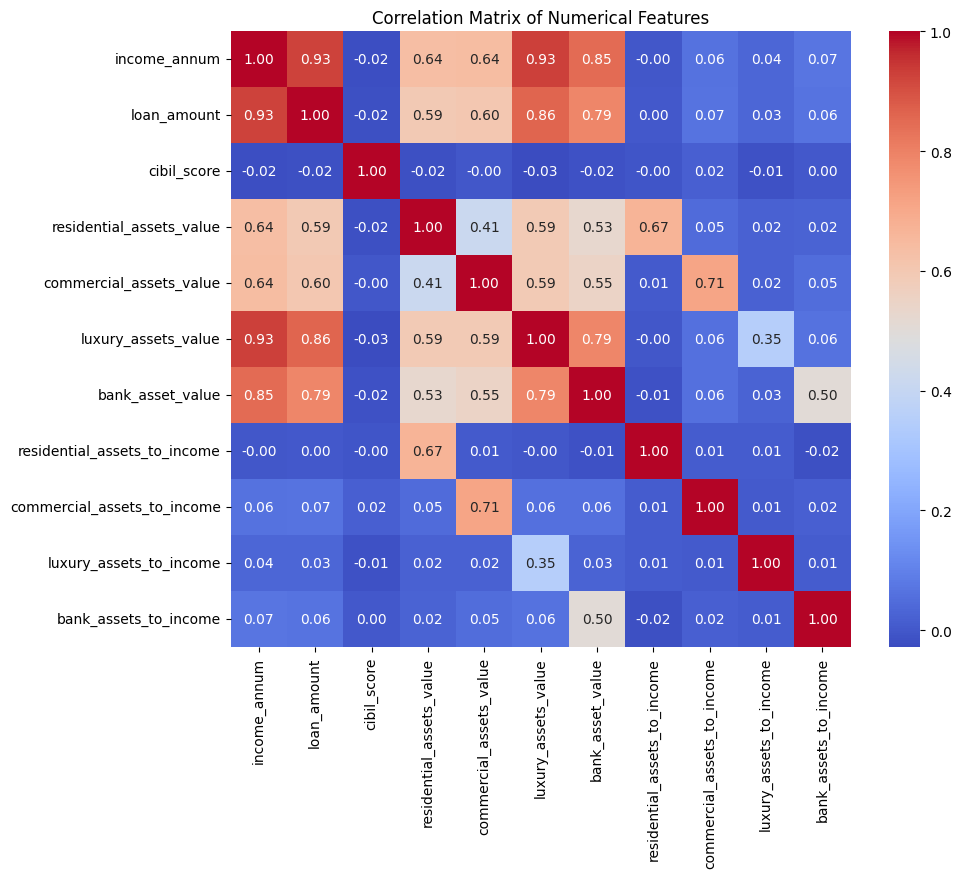

In [133]:

correlation_matrix = data[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [135]:
# Group data by loan status and describe the new features
grouped_proportions = data.groupby('loan_status')[['residential_assets_to_income', 'commercial_assets_to_income', 'luxury_assets_to_income', 'bank_assets_to_income']].describe()
grouped_proportions


residential_assets_to_income                                     \
                                   count      mean       std  min       25%   
loan_status                                                                   
Approved                          2656.0  1.486265  0.876057 -0.5  0.721667   
Rejected                          1613.0  1.463314  0.872071 -0.5  0.708333   

                                     commercial_assets_to_income            \
                  50%       75%  max                       count      mean   
loan_status                                                                  
Approved     1.487340  2.250718  3.0                      2656.0  0.974584   
Rejected     1.461538  2.214286  3.0                      1613.0  0.944277   

                                                                    \
                  std  min       25%       50%       75%       max   
loan_status                                                          
Approved     0.569915  0.0  0.500000  1.000000  1.461779  1.985507   
Rejected     0.586430  0.0  0.428571  0.916667  1.464286  1.988095   

            luxury_assets_to_income                                     \
                              count      mean       std  min       25%   
loan_status                                                              
Approved                     2656.0  2.978704  0.597145  1.5  2.477743   
Rejected                     1613.0  2.977301  0.591469  1.5  2.478261   

                                bank_assets_to_income                      \
                  50%  75%  max                 count      mean       std   
loan_status                                                                 
Approved     2.972027  3.5  4.0                2656.0  0.975051  0.309590   
Rejected     2.971429  3.5  4.0                1613.0  0.966866  0.304264   

                                                     
             min       25%       50%       75%  max  
loan_status                                          
Approved     0.0  0.710314  0.975000  1.246259  1.5  
Rejected     0.0  0.705263  0.964286  1.225806  1.5

##### Insights:
commercial assets to income have the biggest differences in mean of the rejected loans and approved loans. However, the differences were not much.

Nonetheless, we may try including them in the features

Check current numerical_features and categorical features

In [136]:
# Print numerical features
print("Numerical Features:")
print(numerical_features)


# Print categorical features
print("\nCategorical Features:")
categorical_features


Numerical Features:
['income_annum', 'loan_amount', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'residential_assets_to_income', 'commercial_assets_to_income', 'luxury_assets_to_income', 'bank_assets_to_income']

Categorical Features:


['no_of_dependents', 'education', 'self_employed', 'loan_term']


### Create new features in the training set and test set

In [137]:


# Create new features in the training set
X_train['residential_assets_to_income'] = X_train['residential_assets_value'] / X_train['income_annum']
X_train['commercial_assets_to_income'] = X_train['commercial_assets_value'] / X_train['income_annum']
X_train['luxury_assets_to_income'] = X_train['luxury_assets_value'] / X_train['income_annum']
X_train['bank_assets_to_income'] = X_train['bank_asset_value'] / X_train['income_annum']

# Handle potential infinite values resulting from division by zero
X_train.replace([np.inf, -np.inf], 0, inplace=True)


# Create new features in the testing set
X_test['residential_assets_to_income'] = X_test['residential_assets_value'] / X_test['income_annum']
X_test['commercial_assets_to_income'] = X_test['commercial_assets_value'] / X_test['income_annum']
X_test['luxury_assets_to_income'] = X_test['luxury_assets_value'] / X_test['income_annum']
X_test['bank_assets_to_income'] = X_test['bank_asset_value'] / X_test['income_annum']

# Handle potential infinite values resulting from division by zero
X_test.replace([np.inf, -np.inf], 0, inplace=True)


In [139]:
X_train

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,residential_assets_to_income,commercial_assets_to_income,luxury_assets_to_income,bank_assets_to_income
1675,5,Not Graduate,No,7900000,29900000,6,568,5800000,13900000,15900000,8700000,0.734177,1.759494,2.012658,1.101266
1164,0,Not Graduate,Yes,9600000,34000000,12,710,23800000,10300000,38100000,7800000,2.479167,1.072917,3.968750,0.812500
192,1,Graduate,No,800000,2900000,8,682,2200000,1100000,2900000,700000,2.750000,1.375000,3.625000,0.875000
910,2,Graduate,Yes,4900000,13100000,18,754,8200000,3300000,16500000,7200000,1.673469,0.673469,3.367347,1.469388
567,5,Graduate,Yes,3000000,11100000,12,441,8500000,2500000,7300000,2000000,2.833333,0.833333,2.433333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0,Graduate,Yes,1300000,4700000,16,530,3200000,1000000,3800000,800000,2.461538,0.769231,2.923077,0.615385
466,5,Not Graduate,Yes,500000,1800000,18,411,1000000,500000,1300000,200000,2.000000,1.000000,2.600000,0.400000
3092,4,Not Graduate,Yes,8600000,20600000,16,449,10800000,10600000,28700000,5400000,1.255814,1.232558,3.337209,0.627907
3772,2,Not Graduate,Yes,7000000,21400000,12,541,3700000,1300000,19800000,9600000,0.528571,0.185714,2.828571,1.371429


In [140]:


# Scaling numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) #added sparse_output=False so it does not return a sparse matrix

# Fit and transform the categorical features
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Get feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Create DataFrames from encoded arrays
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

# Concatenate scaled numerical and encoded categorical features
X_train_final = pd.concat([X_train.drop(columns=categorical_features), X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test.drop(columns=categorical_features), X_test_encoded_df], axis=1)


print(f"Training data shape after preprocessing: {X_train_final.shape}")
print(f"Testing data shape after preprocessing: {X_test_final.shape}")


Training data shape after preprocessing: (3415, 31)
Testing data shape after preprocessing: (854, 31)


In [141]:
X_train = X_train_final
X_test = X_test_final

See the summarize of columns in X_train so can check if all data were included

In [142]:


pd.set_option("display.max_columns", None)
X_train.head()


,income_annum,loan_amount,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,residential_assets_to_income,commercial_assets_to_income,luxury_assets_to_income,bank_assets_to_income,no_of_dependents_0,no_of_dependents_1,no_of_dependents_2,no_of_dependents_3,no_of_dependents_4,no_of_dependents_5,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,loan_term_2,loan_term_4,loan_term_6,loan_term_8,loan_term_10,loan_term_12,loan_term_14,loan_term_16,loan_term_18,loan_term_20
1675,1.009500,1.624772,-0.187401,-0.255384,2.046786,0.078083,1.160414,-0.845452,1.391837,-1.624371,0.434360,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1164,1.614171,2.077128,0.637397,2.495693,1.223111,2.498432,0.882020,1.138971,0.195359,1.645548,-0.503105,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
192,-1.515891,-1.354157,0.474761,-0.805600,-0.881836,-1.339239,-1.314198,1.446966,0.721791,1.070915,-0.300202,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
910,-0.057566,-0.228784,0.892968,0.111426,-0.378479,0.143498,0.696424,0.222722,-0.500746,0.640207,1.629452,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
567,-0.733375,-0.449445,-0.925072,0.157277,-0.561518,-0.859530,-0.912074,1.541733,-0.222156,-0.921145,-0.976547,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 5. Feature Selection

In [143]:
X_train.columns

Index(['income_annum', 'loan_amount', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value',
       'residential_assets_to_income', 'commercial_assets_to_income',
       'luxury_assets_to_income', 'bank_assets_to_income',
       'no_of_dependents_0', 'no_of_dependents_1', 'no_of_dependents_2',
       'no_of_dependents_3', 'no_of_dependents_4', 'no_of_dependents_5',
       'education_ Graduate', 'education_ Not Graduate', 'self_employed_ No',
       'self_employed_ Yes', 'loan_term_2', 'loan_term_4', 'loan_term_6',
       'loan_term_8', 'loan_term_10', 'loan_term_12', 'loan_term_14',
       'loan_term_16', 'loan_term_18', 'loan_term_20'],
      dtype='object')

In [144]:


from sklearn.feature_selection import SelectKBest, f_classif

# Select top k features based on ANOVA F-value
k = 15  # Choose the number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the selected feature names (based on the package)
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X_train.columns[selected_feature_indices]

# Print the selected feature names (based on the package) and their scores
feature_scores = pd.DataFrame({'Feature': X_train.columns, 'Score': selector.scores_})
print(feature_scores.sort_values(by='Score', ascending=False))
print("\nSelected Features:")
print(selected_feature_names)



                         Feature        Score
2                    cibil_score  5018.317492
22                   loan_term_4    77.205467
21                   loan_term_2    32.868755
25                  loan_term_10    17.819825
23                   loan_term_6     5.585870
28                  loan_term_16     5.151821
8    commercial_assets_to_income     3.821349
30                  loan_term_20     3.586371
27                  loan_term_14     2.478732
24                   loan_term_8     1.754774
3       residential_assets_value     1.720113
0                   income_annum     1.647120
5            luxury_assets_value     1.260139
11            no_of_dependents_0     0.905709
6               bank_asset_value     0.672607
9        luxury_assets_to_income     0.651557
15            no_of_dependents_4     0.572573
16            no_of_dependents_5     0.521453
7   residential_assets_to_income     0.471338
10         bank_assets_to_income     0.392836
29                  loan_term_18  



These features were the final set of selected features from both of EDA and feature importance score


In [160]:

features = ['cibil_score', 'loan_term_2', 'loan_term_4', 'loan_term_6', 'loan_term_10',
             'loan_term_14', 'loan_amount',
             'residential_assets_to_income', 'commercial_assets_to_income',
                'luxury_assets_to_income', 'bank_assets_to_income'
            ]

X_train_selected = X_train[features]
X_test_selected = X_test[features]

## 6. Modelling

### Logistic Regression

In [161]:
# Initialize and train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy of Logistic Regression: 0.936768149882904
              precision    recall  f1-score   support

    Approved       0.96      0.94      0.95       536
    Rejected       0.90      0.93      0.92       318

    accuracy                           0.94       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.94      0.94      0.94       854



### Decision Tree

In [162]:

from sklearn.tree import DecisionTreeClassifier

# Initialize and train the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_selected)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of Decision Tree: {accuracy_dt}")
print(classification_report(y_test, y_pred_dt))


Accuracy of Decision Tree: 0.9578454332552693
              precision    recall  f1-score   support

    Approved       0.97      0.96      0.97       536
    Rejected       0.94      0.95      0.94       318

    accuracy                           0.96       854
   macro avg       0.95      0.96      0.96       854
weighted avg       0.96      0.96      0.96       854



### Random Forest

In [163]:

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_selected)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))


Accuracy of Random Forest: 0.9660421545667447
              precision    recall  f1-score   support

    Approved       0.97      0.98      0.97       536
    Rejected       0.96      0.95      0.95       318

    accuracy                           0.97       854
   macro avg       0.96      0.96      0.96       854
weighted avg       0.97      0.97      0.97       854



### Lightgbm

In [148]:
!pip install lightgbm

In [164]:

import lightgbm as lgb

# Initialize and train the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_lgb = lgb_model.predict(X_test_selected)

# Evaluate the model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"Accuracy of LightGBM: {accuracy_lgb}")
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 1295, number of negative: 2120
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1538
[LightGBM] [Info] Number of data points in the train set: 3415, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379209 -> initscore=-0.492905
[LightGBM] [Info] Start training from score -0.492905
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy of LightGBM: 0.9543325526932084
              precision    re

### Support Vector Machine

In [165]:

from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_selected)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of SVM: {accuracy_svm}")
print(classification_report(y_test, y_pred_svm))


Accuracy of SVM: 0.9355971896955504
              precision    recall  f1-score   support

    Approved       0.96      0.93      0.95       536
    Rejected       0.89      0.94      0.92       318

    accuracy                           0.94       854
   macro avg       0.93      0.94      0.93       854
weighted avg       0.94      0.94      0.94       854



Gradient Boosting

In [166]:

# Initialize and train the Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test_selected)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy of Gradient Boosting Classifier: {accuracy_gb}")
print(classification_report(y_test, y_pred_gb))


Accuracy of Gradient Boosting Classifier: 0.9566744730679156
              precision    recall  f1-score   support

    Approved       0.97      0.96      0.97       536
    Rejected       0.94      0.94      0.94       318

    accuracy                           0.96       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.96      0.96      0.96       854



##7. Evaluation

#### Accuracy, Precision, Recall, F1, AUC

In [167]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


model_results = []

# Function to evaluate and store metrics
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)

    # AUC score requires probability estimates (decision_function or predict_proba)
    try:
        y_prob = model_name.predict_proba(X_test_selected)[:, 1]
        auc = roc_auc_score(y_true, y_prob)
    except AttributeError:
        try:
          y_prob = model_name.decision_function(X_test_selected)
          auc = roc_auc_score(y_true, y_prob)
        except:
          auc = "Not applicable"

    model_results.append([model_name.__class__.__name__, accuracy, precision, recall, f1, auc])

# Evaluate each model
evaluate_model(logreg_model, y_test, y_pred)
evaluate_model(dt_model, y_test, y_pred_dt)
evaluate_model(rf_model, y_test, y_pred_rf)
evaluate_model(lgb_model, y_test, y_pred_lgb)
evaluate_model(svm_model, y_test, y_pred_svm)
evaluate_model(gb_model, y_test, y_pred_gb)

# Create a DataFrame for visualization
results_df = pd.DataFrame(model_results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])
results_df


,Model,Accuracy,Precision,Recall,F1,AUC
0,LogisticRegression,0.936768,0.937251,0.936768,0.936923,0.973300
1,DecisionTreeClassifier,0.957845,0.957995,0.957845,0.957898,0.956186
2,RandomForestClassifier,0.966042,0.966001,0.966042,0.966009,0.996905
3,LGBMClassifier,0.954333,0.954306,0.954333,0.954318,0.996081
4,SVC,0.935597,0.936769,0.935597,0.935882,0.984717
5,GradientBoostingClassifier,0.956674,0.956705,0.956674,0.956688,0.996527


##### Interpretation
Random Forest model provide the highest accuracy, precision, recall, F1, and AUC score, indicating it works the best for predicting this problem.


#### Feature Importance

                         Feature  Importance
0                    cibil_score    0.820636
2                    loan_term_4    0.034868
6                    loan_amount    0.026284
7   residential_assets_to_income    0.025804
9        luxury_assets_to_income    0.022685
8    commercial_assets_to_income    0.022186
10         bank_assets_to_income    0.021788
1                    loan_term_2    0.021100
4                   loan_term_10    0.002584
3                    loan_term_6    0.001356
5                   loan_term_14    0.000709


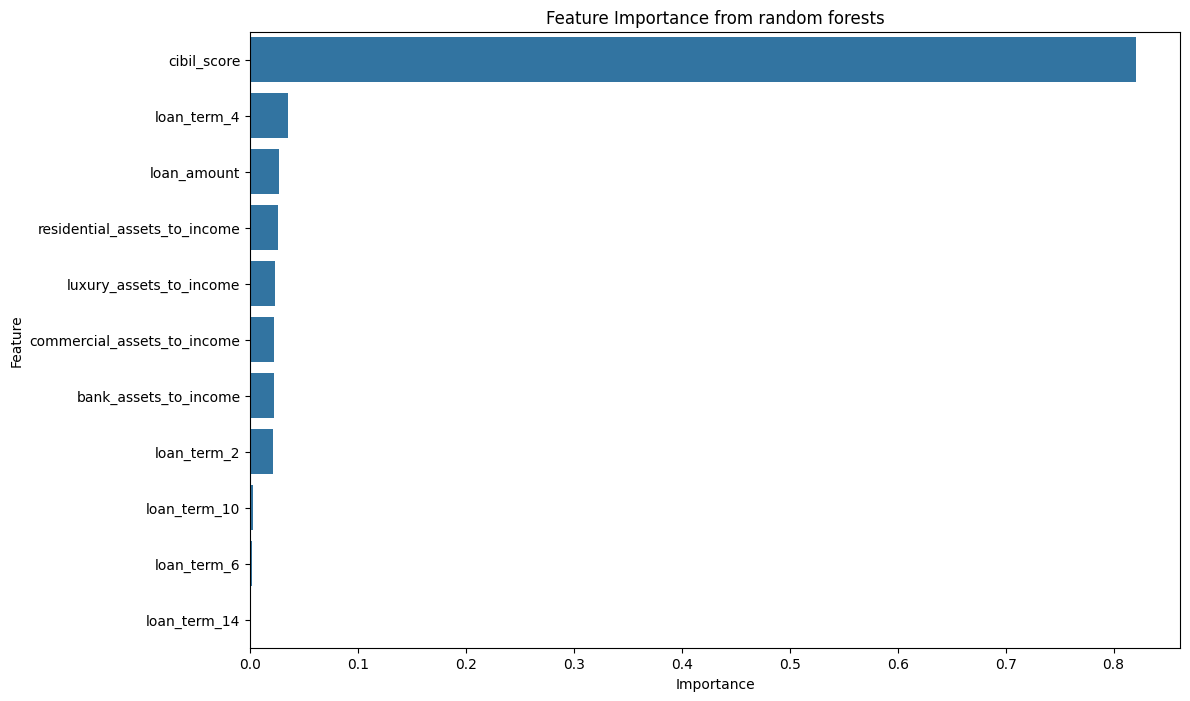

In [168]:
#feature importance of random forest

importances = rf_model.feature_importances_
feature_names = X_train_selected.columns

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from random forests')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



##### Interpretation
1. The cibil score has the highest importance score, which is consistent with the fact that it has the most obvious pattern with loan_status in EDA. (The rejected applicants mostly have relatively lower score than the approved ones.)
2. Loan term = 4 and 2 have the highest score among all loan term features.
3. loan_amount, ratio of assets value to income : Even though they don't exhibit strong relationship with loan_status in the EDA, they still have some importance scores, indicating they can help improving the model


## 7. Summary

The best model from this analysis is Random Forest. The feature that affect the models the most is cibil score. The loan_amount, loan_term, and ratio of individual assets to income can relatively help improving the model.